# Разведочный анализ данных: начало

Мы будем работать с датасетом про алмазы - в нем содержатся их различные характеристики, а также стоимость.

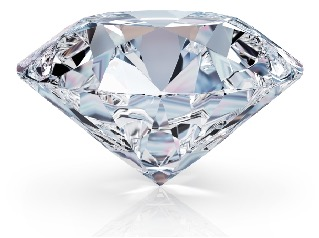

[Интересная статья про качество алмазов](https://www.diamonds.pro/education/diamond-depth-and-table/)

**Цели на сегодня:**

* понять влияние различных характеристик алмазов на их качество и стоимость

* научиться делать разведочный анализ данных

* изучить библиотеки pandas, numpy и matplotlib, seaborn

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DIAMONDS_DATASET = "/content/drive/My Drive/ML_data_kt/diamonds_good.csv"

In [5]:
df = pd.read_csv(DIAMONDS_DATASET)

## Описание данных

* `carat` - число каратов алмаза
* `cut` - огранка алмаза
* `color` - цвет алмаза
* `clarity` - прозрачность алмаза
* `depth` - глубина алмаза
* `table` - платформа алмаза (грань, которую можно увидеть, если смотреть на камень лицевой стороной вверх)
* `price` - цена алмаза
* `x` - размер алмаза по оси x
* `y` - размер алмаза по оси y
* `z` - размер алмаза по оси z

In [6]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75
5,NaN,Very Good,J,VVS2,62.8,57.0,336.0,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336.0,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337.0,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337.0,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338.0,4.00,4.05,2.39


In [7]:
df.tail()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
53935,0.72,Ideal,D,SI1,60.8,57.0,2757.0,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757.0,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757.0,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757.0,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757.0,5.83,5.87,3.64


In [8]:
df.sample(3)

,carat,cut,color,clarity,depth,table,price,'x','y','z'
14714,0.30,Premium,H,VVS2,61.5,58.0,605.0,4.28,4.30,2.64
1877,0.71,Ideal,E,VS2,62.2,57.0,3073.0,5.69,5.73,3.55
25632,2.06,Ideal,I,SI2,63.3,54.0,14505.0,8.09,8.14,5.13


## Исследование данных

Размер датасета

In [9]:
df.shape

(53940, 10)

Информация о типах данных и пропусках

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53442 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    52950 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53935 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Основные числовые характеристики

In [11]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53442.000000,52950.000000,53940.000000,53940.000000,53940.000000,53935.000000,53940.000000
mean,0.797561,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
std,0.473534,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
df.describe(include='object')

,cut,color,clarity
count,53940,53940,53940
unique,6,7,8
top,Ideal,G,SI1
freq,21524,11292,13065


In [13]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,'x','y','z'
count,53442.000000,53940,53940,53940,52950.000000,53940.000000,53940.000000,53940.000000,53935.000000,53940.000000
unique,NaN,6,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21524,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797561,NaN,NaN,NaN,61.749422,57.457184,3932.799722,5.731157,5.734469,3.538734
std,0.473534,NaN,NaN,NaN,1.431558,2.234491,3989.439738,1.121761,1.142125,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [14]:
df.duplicated().sum()

np.int64(135)

In [15]:
# df[условие фильтрации]

In [16]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,'x','y','z'
1005,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898.0,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105.0,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919.0,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093.0,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130.0,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203.0,5.19,5.17,3.17


In [17]:
# df = df.drop_duplicates()

df.drop_duplicates(inplace=True)

df.shape

(53805, 10)

In [18]:
df.reset_index(inplace=True, drop=True)

df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


In [19]:
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,Ideal,E,SI2,61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335.0,4.34,4.35,2.75


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

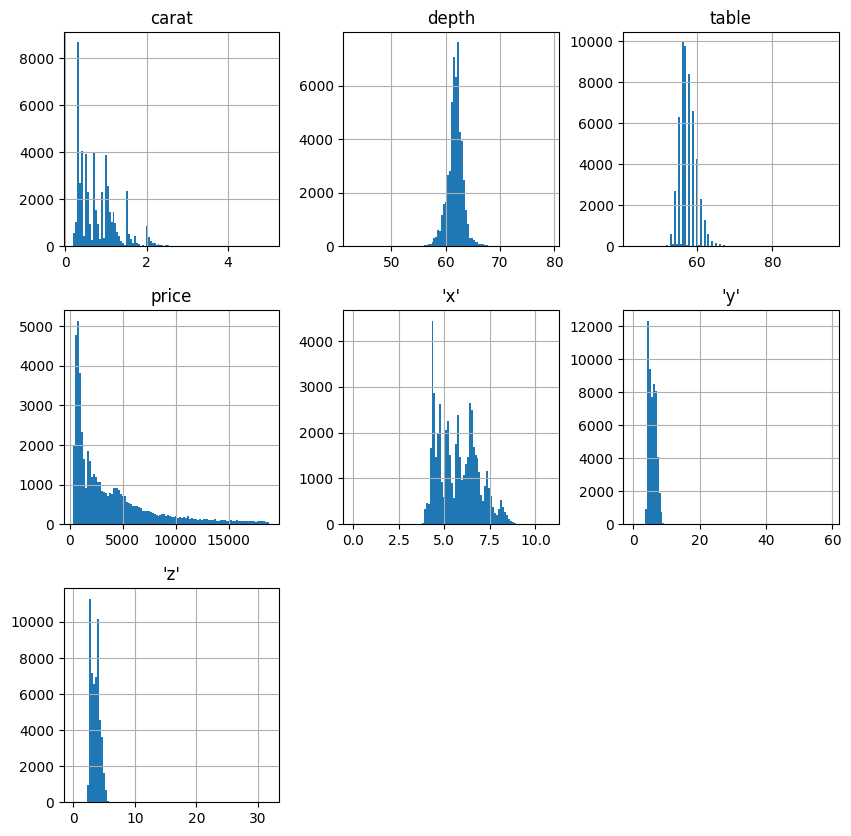

In [20]:
df[["carat","depth","table","price","'x'","'y'","'z'"]].hist(bins=100, figsize=(10,10));

In [21]:
median_carat = df['carat'].median()

df.fillna({'carat': median_carat}, inplace=True)

In [22]:
median_depth = df['depth'].median()

df['depth'].fillna(median_depth, inplace=True)

/tmp/ipython-input-2155475674.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['depth'].fillna(median_depth, inplace=True)


### Задание 1

Заполните пропуски в столбце `y` медианным значением. Чему равно это значение? Ответ округлите до сотых.

In [23]:
# ваш код здесь
median_y = df["'y'"].median()
median_y

5.71

In [24]:
df["'y'"].fillna(median_y, inplace=True)

/tmp/ipython-input-2821821043.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["'y'"].fillna(median_y, inplace=True)


## Однофакторный анализ

### Число карат

* мелкие — массой до 0,30 карат (не включительно);
* средние — массой от 0,30 до 1 карат (не включительно);
* крупные – 1 карат и выше, называют солитеры.


Небольшие бриллианты различного размера, полученные при огранке алмаза, и весящие каждый в отдельности менее 0,25 карат, называют *melee (мили)*. Полученные таким же путем более крупные бриллианты различного размера называют *melange (меланж)*.


Бриллианты более 6 карат обычно продаются c аукционов.


Алмазам и бриллиантам более 25 карат присваивают собственные имена.

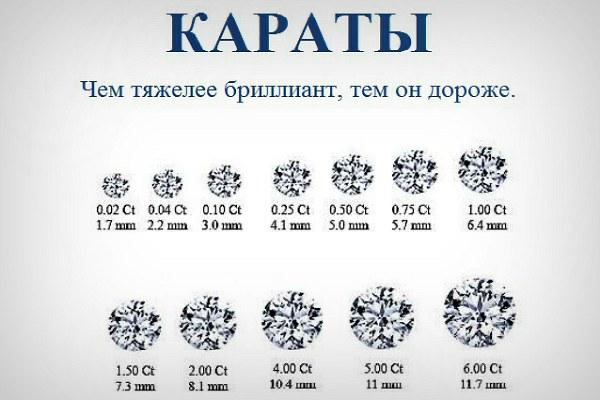

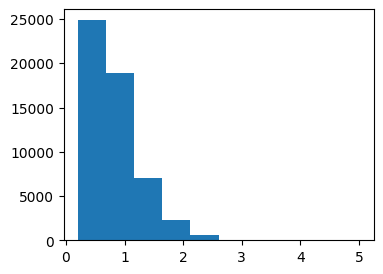

In [25]:
plt.figure(figsize=(4,3))

plt.hist(df.carat);

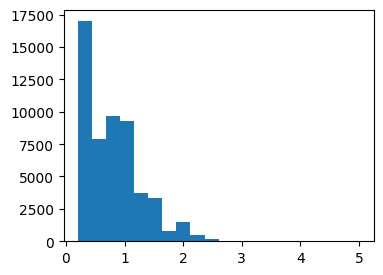

In [26]:
plt.figure(figsize=(4,3))

plt.hist(df.carat, bins=20);

Сколько карат весит самый тяжелый бриллиант в датасете? А самый легкий?

In [27]:
df.carat.min(), df.carat.max()

(0.2, 5.01)

Сколько мелких бриллиантов в датасете?

In [28]:
len(df[df.carat < 0.3])

1582

Сколько процентов бриллиантов среди всего датасета - крупные?

In [29]:
100 * len(df[df.carat >= 1]) / len(df)

35.00046464083264

Посмотрим как число карат влияет на стоимость алмаза

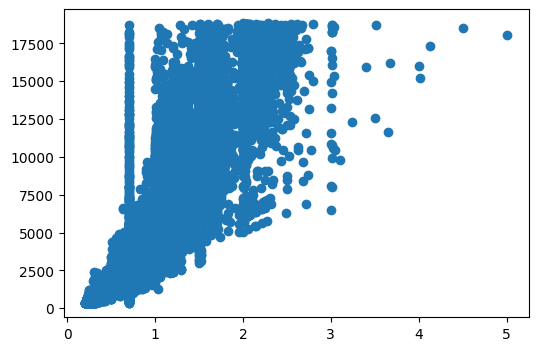

In [30]:
plt.figure(figsize=(6,4))

plt.scatter(df.carat, df.price);

In [31]:
np.corrcoef(df.carat, df.price)[0][1]

np.float64(0.9164989435440223)

### Cut (огранка алмаза)

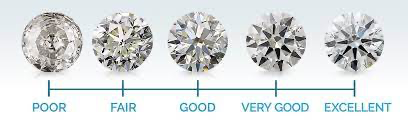

In [32]:
df['cut'].value_counts(normalize=True)

,proportion
cut,
Ideal,0.398941
Premium,0.255088
Very Good,0.224013
Good,0.090772
Fair,0.029700
Goood,0.001487


In [33]:
df['cut'] = df['cut'].replace('Goood', 'Good')

Посмотрим как влияет огранка алмаза на его стоимость

/tmp/ipython-input-1625806102.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cut', y='price', data = df, palette='summer')


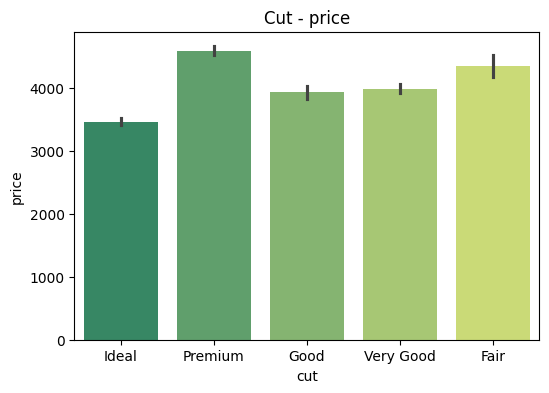

In [34]:
plt.figure(figsize=(6,4))

sns.barplot(x='cut', y='price', data = df, palette='summer')
plt.title('Cut - price')
plt.show();

### Задание 2

Какое максимальное число карат весит алмаз огранки `Fair`?
Ответ округлите до сотых.

In [35]:
# ваш код здесь
df[df['cut'] == 'Fair']['carat'].max()

5.01

Посчитаем среднюю стоимость алмазов в каждой категории

In [36]:
df.groupby('cut')['price'].mean()

,price
cut,
Fair,4347.735294
Good,3926.266317
Ideal,3462.593850
Premium,4581.864918
Very Good,3982.162781


Посчитаем несколько характеристик в зависимости от огранки

In [37]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean'))

,PriceMean,PriceMedian,CaratMean
cut,,,
Fair,4347.735294,3282.0,1.040094
Good,3926.266317,3029.5,0.845796
Ideal,3462.593850,1813.0,0.703331
Premium,4581.864918,3175.0,0.889616
Very Good,3982.162781,2649.0,0.804177


In [38]:
df.groupby('cut').agg(PriceMean=('price','mean'),
                      PriceMedian=('price', 'median'),
                      CaratMean=('carat', 'mean')).sort_values(by='PriceMean', ascending=False)

,PriceMean,PriceMedian,CaratMean
cut,,,
Premium,4581.864918,3175.0,0.889616
Fair,4347.735294,3282.0,1.040094
Very Good,3982.162781,2649.0,0.804177
Good,3926.266317,3029.5,0.845796
Ideal,3462.593850,1813.0,0.703331


## Table and Depth

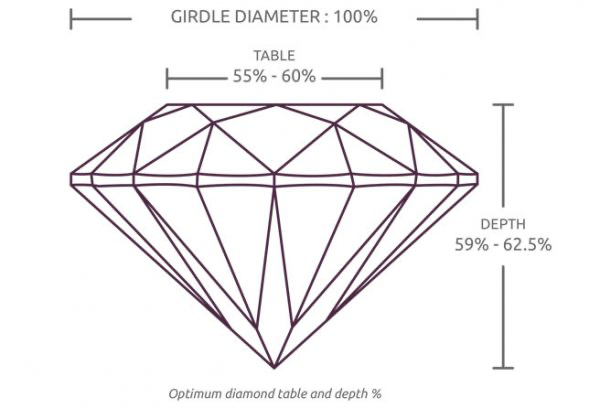

Оптимальное значение параметра `table` для алмаза [55%; 60%].

Какая доля алмазов в данных имеют оптимальное значение `table`?

In [39]:
len(df[(df.table >= 55) & (df.table <= 60)]) / len(df)

0.8439364371340954

### Задание 3

Оптимальное значение параметра `depth` для алмаза [59%; 62.5%].

Какая доля алмазов в данных имеют одновременно оптимальное значение `table` и `depth`?

Ответ округлите до сотых.

In [ ]:
# ваш код здесь
round(len(df[(df.table >= 55) & (df.table <= 60) & (df.depth >= 59) & (df.depth <= 62.5)]) / len(df), 2)

0.6206300529690549

### Задание 4

Сравните медианную стоимость всех алмазов, и алмазов с оптимальными table & depth. Какая больше?

In [41]:
# ваш код здесь
median_base = df['price'].median()
median_optimal = df[(df.table >= 55) & (df.table <= 60) & (df.depth >= 59) & (df.depth <= 62.5)]['price'].median()

if (median_base > median_optimal):
  print('медианная стоимость всех алмазов больше и равна: ', median_base)
else:
  print('медианная стоимость алмазов с оптимальными table & depth больше и равна: ', median_base)

медианная стоимость всех алмазов больше и равна:  2401.0


Вычислите корреляцию `table` и `price`, а затем `depth`и `price`. Какой параметр влияет на цену больше?

In [42]:
np.corrcoef(df.table, df.price)[0][1]

np.float64(0.12662153885758198)

In [43]:
np.corrcoef(df.depth, df.price)[0][1]

np.float64(-0.010831614226837228)

## Clarity - прозрачность алмаза

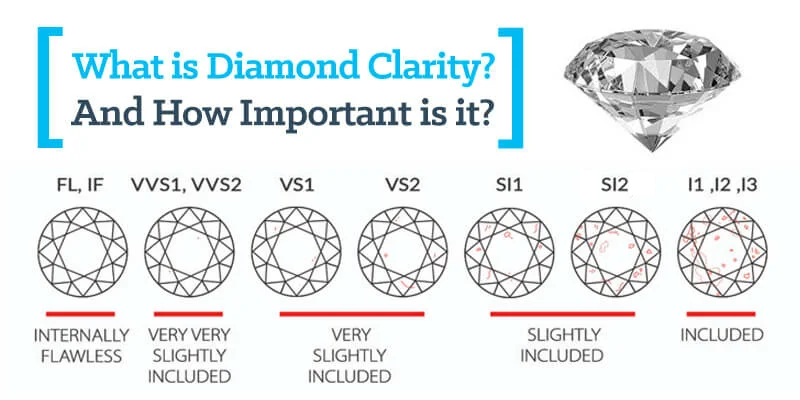

### Задание 5

Сколько различных градаций есть в столбце `clarity`?

In [44]:
# ваш код здесь
print(df.clarity.unique())
len(df.clarity.unique())

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


8

### Задание 6

Сколько алмазов в таблице, относящихся к категории `very very slightly included`?

In [45]:
# ваш код здесь
len(df[(df.clarity == "VVS1") | (df.clarity == "VVS2") ])

8704

### Задание 7

Нарисуйте график зависимости цены алмазов от `clarity`. Алмазы какой категории в наших данных стоят дороже остальных?

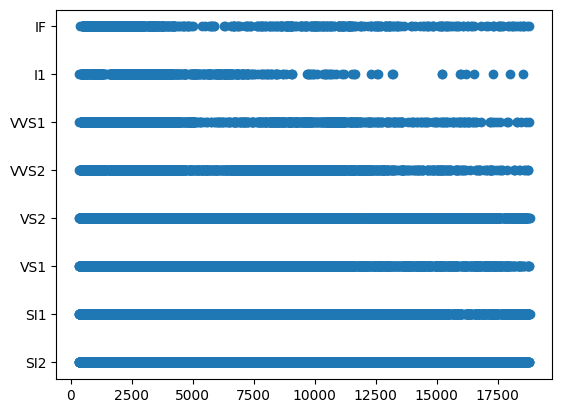

In [46]:
# ваш код здесь
plt.scatter(df.price, df.clarity)

### Задание 8

Для каждой пары значений категорий (`cut`,`clarity`) вычислим среднюю и медианную стоимость. Результат отсортируем по убыванию средней стоимости.

Алмазы какой огранки (`cut`) в совокупностью с некоторой категорией `clarity` имеют наибольшую среднюю стоимость?

In [47]:
# ваш код здесь
result = df.groupby(['cut', 'clarity'])['price'].agg(
    mean_price='mean',
    median_price='median'
).reset_index()

result_sorted = result.sort_values(by='mean_price', ascending=False)

print(result_sorted)

top_row = result_sorted.iloc[0]
print(f"\nНаибольшая средняя стоимость у огранки '{top_row['cut']}' и чистоты '{top_row['clarity']}'")

          cut clarity   mean_price  median_price
27    Premium     SI2  5556.262491        4292.5
3        Fair     SI2  5145.740175        3681.0
35  Very Good     SI2  4988.709447        4042.0
19      Ideal     SI2  4761.711917        4068.0
11       Good     SI2  4544.119816        3763.0
29    Premium     VS2  4539.441053        2724.0
28    Premium     VS1  4491.247730        2362.0
26    Premium     SI1  4451.865244        3618.0
33  Very Good      IF  4373.299625        1708.0
16      Ideal      I1  4335.726027        3673.5
13       Good     VS2  4280.315631        3220.5
37  Very Good     VS2  4217.842758        2727.0
2        Fair     SI1  4201.818182        3511.0
5        Fair     VS2  4189.217054        3202.5
4        Fair     VS1  4165.141176        2829.5
9        Good      IF  4141.931507        1806.0
32  Very Good      I1  4078.226190        3283.0
24    Premium      I1  3947.331707        3261.0
34  Very Good     SI1  3936.972136        2810.0
6        Fair    VVS

## Pandas profiling

In [48]:
# !pip install ydata_profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

     - 17.9 MB 21.1 MB/s 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 46.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.9 MB/s eta 0:00:00


In [49]:
from ydata_profiling import ProfileReport

In [50]:
df_copy = pd.read_csv(DIAMONDS_DATASET)

profile_report = ProfileReport(df_copy, title='Pandas Profiling Report')

In [51]:
profile_report

Output hidden; open in https://colab.research.google.com to view.

In [52]:
profile_report.to_file('Diamonds_report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Домашнее задание

## 1) x, y, z

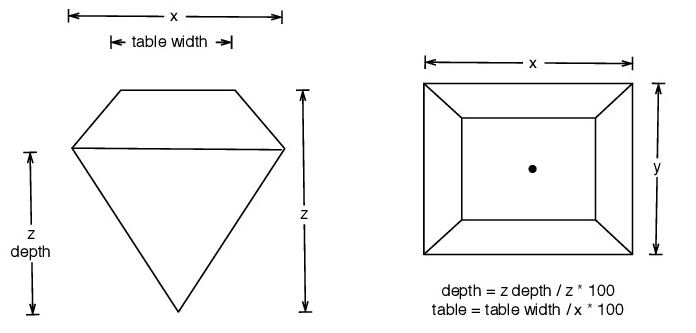

In [53]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

Переименуем колонки

In [54]:
df = df.rename(columns={"'x'" : 'x', "'y'" : 'y', "'z'" : 'z'})
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

### Задание 1

Для каждого из трех столбцов (`x`, `y`, `z`) вычислите медианное значение. В ответ запишите максимальное из полученных чисел без округлений.

In [55]:
# ваш код здесь
median = df[['x', 'y', 'z']].median()

print(median.max())


5.71


Для каждого из этих столбцов вычислите минимальное значение.

In [56]:
np.min(df['x']), np.min(df['y']), np.min(df['z'])

(0.0, 0.0, 0.0)

Нулевые размеры - явно ошибки.

### Задание 2

Выведите на экран все строки таблицы (только столбцы `x`,`y`,`z`), в которых хотя бы одна из координат равна нулю.

Сколько таких строк?

In [57]:
# ваш код здесь
print('Строк', len(df[(df.x == 0) | (df.y == 0) | (df.z == 0)]))
df[(df.x == 0) | (df.y == 0) | (df.z == 0)]

Строк 19


,carat,cut,color,clarity,depth,table,price,x,y,z
2201,1.00,Premium,G,SI2,59.1,59.0,3142.0,6.55,6.48,0.0
2308,1.01,Premium,H,I1,58.1,59.0,3167.0,6.66,6.60,0.0
4779,1.10,Premium,G,SI2,63.0,59.0,3696.0,6.50,6.47,0.0
5458,1.01,Premium,F,SI2,59.2,58.0,3837.0,6.50,6.47,0.0
10146,1.50,Good,G,I1,64.0,61.0,4731.0,7.15,7.04,0.0
11158,1.07,Ideal,F,SI2,61.6,56.0,4954.0,0.00,6.62,0.0
11937,1.00,Very Good,H,VS2,63.3,53.0,5139.0,0.00,0.00,0.0
13572,1.15,Ideal,G,VS2,59.2,56.0,5564.0,6.88,6.83,0.0
15916,1.14,Fair,G,VS1,57.5,67.0,6381.0,0.00,0.00,0.0
24342,2.18,Premium,H,SI2,59.4,61.0,12631.0,8.49,8.45,0.0


### Задание 3

Удалите из таблицы эти строки. Сколько строк осталось в таблице?

In [58]:
df = df.drop(df[(df.x == 0) | (df.y == 0) | (df.z == 0)].index)

In [59]:
len(df)

53786

### Задание 4

Вычислите корреляцию между каждым из этих столбцов и `price`. Какой столбец коррелирует с ценой алмаза больше всего?

In [60]:
# ваш код здесь
correlations = df.corr(numeric_only=True)['price']
correlations

,price
carat,0.916492
depth,-0.010928
table,0.126722
price,1.000000
x,0.887183
y,0.867665
z,0.868089


больше всего коррелирует carat

### Задание 5

Постройте scatter-plot для отражения зависимости между ценой алмаза и координатой, наиболее с ней коррелирующей. На какую зависимость она больше всего похожа?

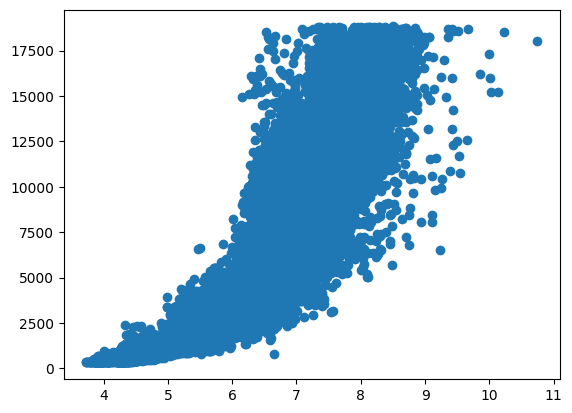

In [61]:
# ваш код здесь
plt.scatter(df.x, df.price)

Похоже на экспоненциальную зависимость


### Задание 6

Какой процент среди всех алмазов имеет `x` и `y` размеры, превышающие средние значения (по `x` и `y`)? Ответ округлите до целого числа.

In [62]:
# ваш код здесь
print(round(len(df[(df.x > df.x.mean()) & (df.y > df.y.mean())])/len(df)*100), '%')

47 %


### Задание 7

Какая доля среди крупных алмазов имеет `z`-размеры, меньшие медианного? Ответ округлите до четырех знаков после запятой.

In [63]:
# ваш код здесь
print(round(len(df[df.carat >= 1][df[df.carat >= 1].z < df.z.median()])/len(df[df.carat >= 1]), 4))

0.0002


## 2) Color

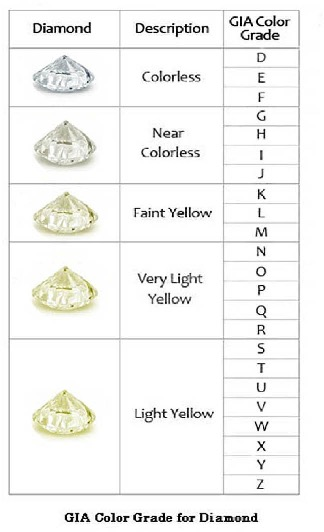

### Задание 8

К каким категориям (Description) из градации выше относятся алмазы в данных?

In [64]:
# ваш код здесь
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

Относятся к Colorless, Near Colorless

### Задание 9

Нарисуйте график, отражающий зависимость стоимости алмазов от его категории цвета.

Алмазы какого цвета стоят дороже остальных?

/tmp/ipython-input-582727225.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='color', y='price', data = df, palette='winter')


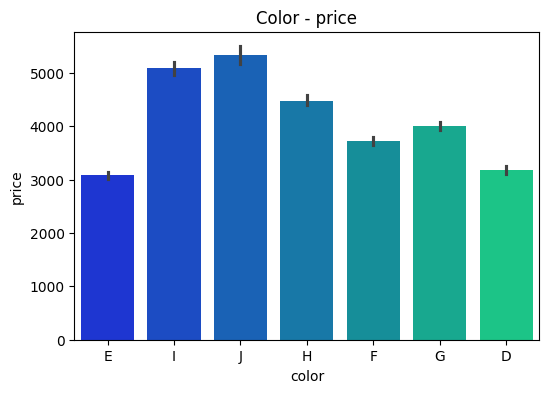

In [65]:
# ваш код здесь
plt.figure(figsize=(6,4))

sns.barplot(x='color', y='price', data = df, palette='winter')
plt.title('Color - price')
plt.show();

Алмазы цвета J дороже остальных

### Задание 10

Для каждого цвета алмаза вычислите медианную стоимость и медианный вес (в каратах). Отсортируйте полученную при помощи groupby таблицу по убыванию медианной стоимости.

Верно ли, что при убывании PriceMedian, сгруппированной по цвету, CaratMedian также убывает? (не возрастает)

In [66]:
# ваш код здесь
df.groupby('color').agg(
    PriceMedian=('price','median'),
    CaratMedian=('carat', 'median')
  ).sort_values(by='PriceMedian', ascending=False)

,PriceMedian,CaratMedian
color,,
J,4234.5,1.11
I,3721.5,1.00
H,3449.5,0.90
F,2345.0,0.70
G,2242.0,0.70
D,1842.0,0.54
E,1741.0,0.54


Да, верно


### Задание 11

Вычислите среднюю стоимость алмазов по каждой тройке категорий (`cut`,`color`,`clarity`). Какие алмазы дороже остальных?

В ответе запишите тройку названий в скобках через запятую, без кавычек и пробелов. Например, (Premium,D,IF)

In [67]:
# ваш код здесь
res = df.groupby(['cut', 'color', 'clarity']).agg(
    AvgPrice=('price', 'mean')
  ).sort_values('AvgPrice', ascending=False)

maxCostly = res.index[0]
maxCostly

('Very Good', 'D', 'IF')

Практика

In [68]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [69]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [70]:
df_encoded = df.copy()

In [71]:
cut_order = {'Ideal': 4, 'Premium': 3, 'Very Good': 2, 'Good': 1, 'Fair': 0}
clarity_map = {'I1': 7, 'SI2': 6, 'SI1': 5, 'VS2': 4, 'VS1': 3, 'VVS1': 2, 'VVS2': 1, 'IF': 0}

df_encoded['cut_encoded'] = df_encoded['cut'].map(cut_order)
df_encoded['clarity_encoded'] = df_encoded['clarity'].map(clarity_map)

In [72]:
from sklearn.preprocessing import OneHotEncoder

color_col = df[['color']]

encoder = OneHotEncoder(sparse_output=False)
encoded_array = encoder.fit_transform(color_col)

encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(['color']),
    index=df.index
)

df_encoded = pd.concat([df_encoded, encoded_df], axis=1)

In [73]:
df_encoded = df_encoded.drop(['cut', 'clarity', 'color'], axis=1)


In [74]:
corr_matrix = df_encoded.corr()
corr_matrix

,carat,depth,table,price,x,y,z,cut_encoded,clarity_encoded,color_D,color_E,color_F,color_G,color_H,color_I,color_J
carat,1.000000,0.028384,0.180016,0.916492,0.972709,0.948870,0.955969,-0.132324,0.340676,-0.110872,-0.138693,-0.059177,-0.029116,0.101529,0.159167,0.180763
depth,0.028384,1.000000,-0.294247,-0.010928,-0.024345,-0.026725,0.094473,-0.215091,0.066041,-0.014861,-0.029379,-0.017546,0.004023,0.025613,0.023895,0.022006
table,0.180016,-0.294247,1.000000,0.126722,0.195467,0.183742,0.151712,-0.432445,0.156773,-0.008523,0.007222,-0.004808,-0.039104,0.011610,0.017560,0.037408
price,0.916492,-0.010928,0.126722,1.000000,0.887183,0.867665,0.868089,-0.052539,0.137791,-0.072195,-0.100770,-0.023869,0.008736,0.058500,0.096487,0.082013
x,0.972709,-0.024345,0.195467,0.887183,1.000000,0.974774,0.975395,-0.124843,0.361829,-0.105822,-0.134817,-0.047602,-0.024547,0.095938,0.145826,0.165393
y,0.948870,-0.026725,0.183742,0.867665,0.974774,1.000000,0.956581,-0.120769,0.348146,-0.103667,-0.130640,-0.046498,-0.024382,0.093566,0.142222,0.161461
z,0.955969,0.094473,0.151712,0.868089,0.975395,0.956581,1.000000,-0.149079,0.359300,-0.105760,-0.133819,-0.048874,-0.023599,0.096051,0.144964,0.165001
cut_encoded,-0.132324,-0.215091,-0.432445,-0.052539,-0.124843,-0.120769,-0.149079,1.000000,-0.182194,0.007679,-0.003926,-0.007303,0.039937,-0.010634,-0.008728,-0.036131
clarity_encoded,0.340676,0.066041,0.156773,0.137791,0.361829,0.348146,0.359300,-0.182194,1.000000,0.076906,0.020277,-0.022568,-0.130096,0.035714,0.021798,0.039561
color_D,-0.110872,-0.014861,-0.008523,-0.072195,-0.105822,-0.103667,-0.105760,0.007679,0.076906,1.000000,-0.178629,-0.175731,-0.194969,-0.161544,-0.126711,-0.088846


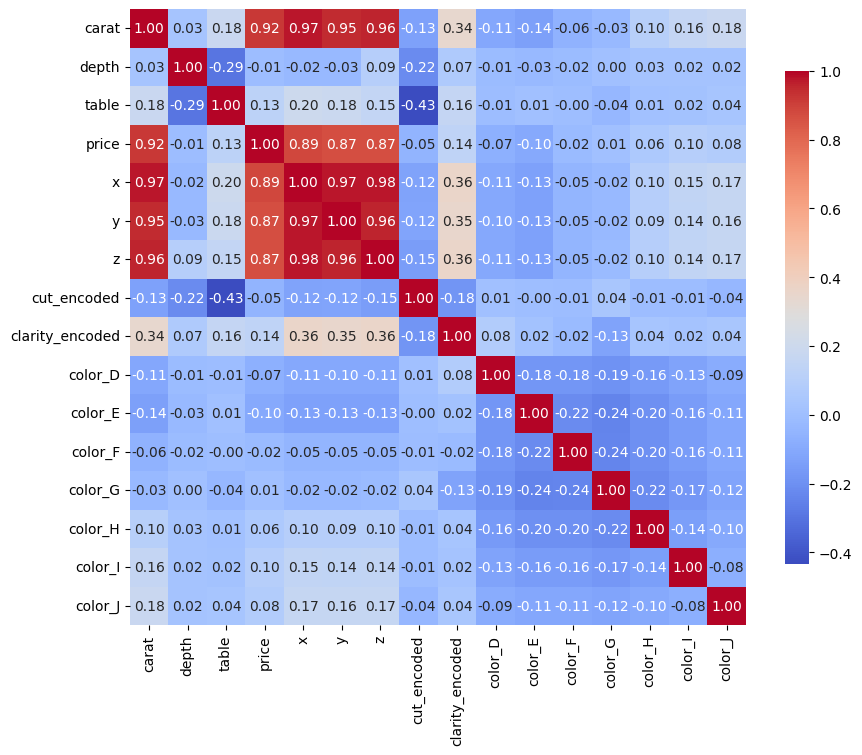

In [75]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.show()

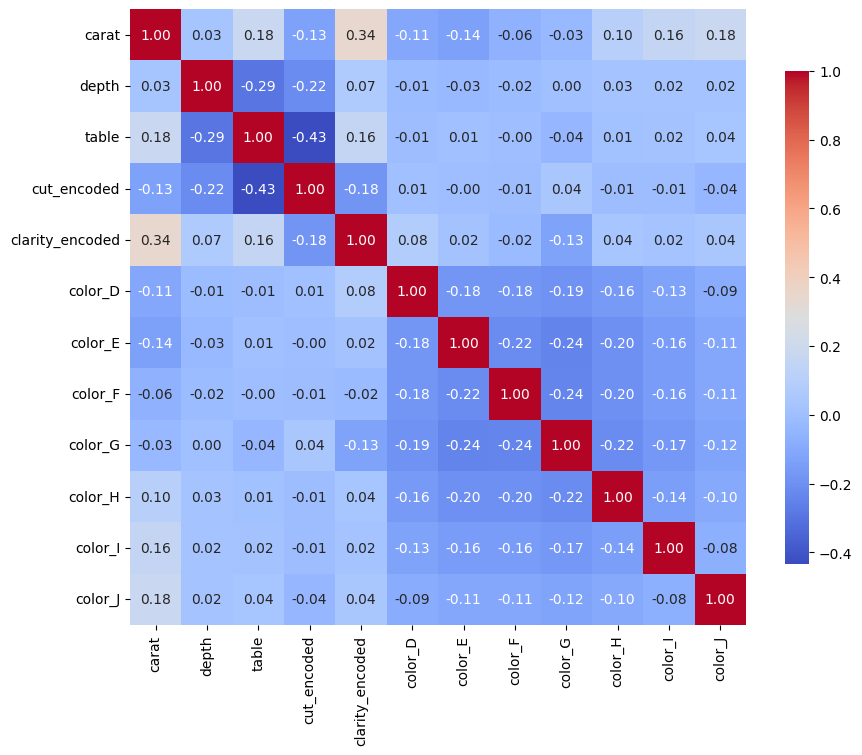

In [76]:
corr_matrix = df_encoded.drop(['price','x','y','z'], axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8}
)
plt.show()

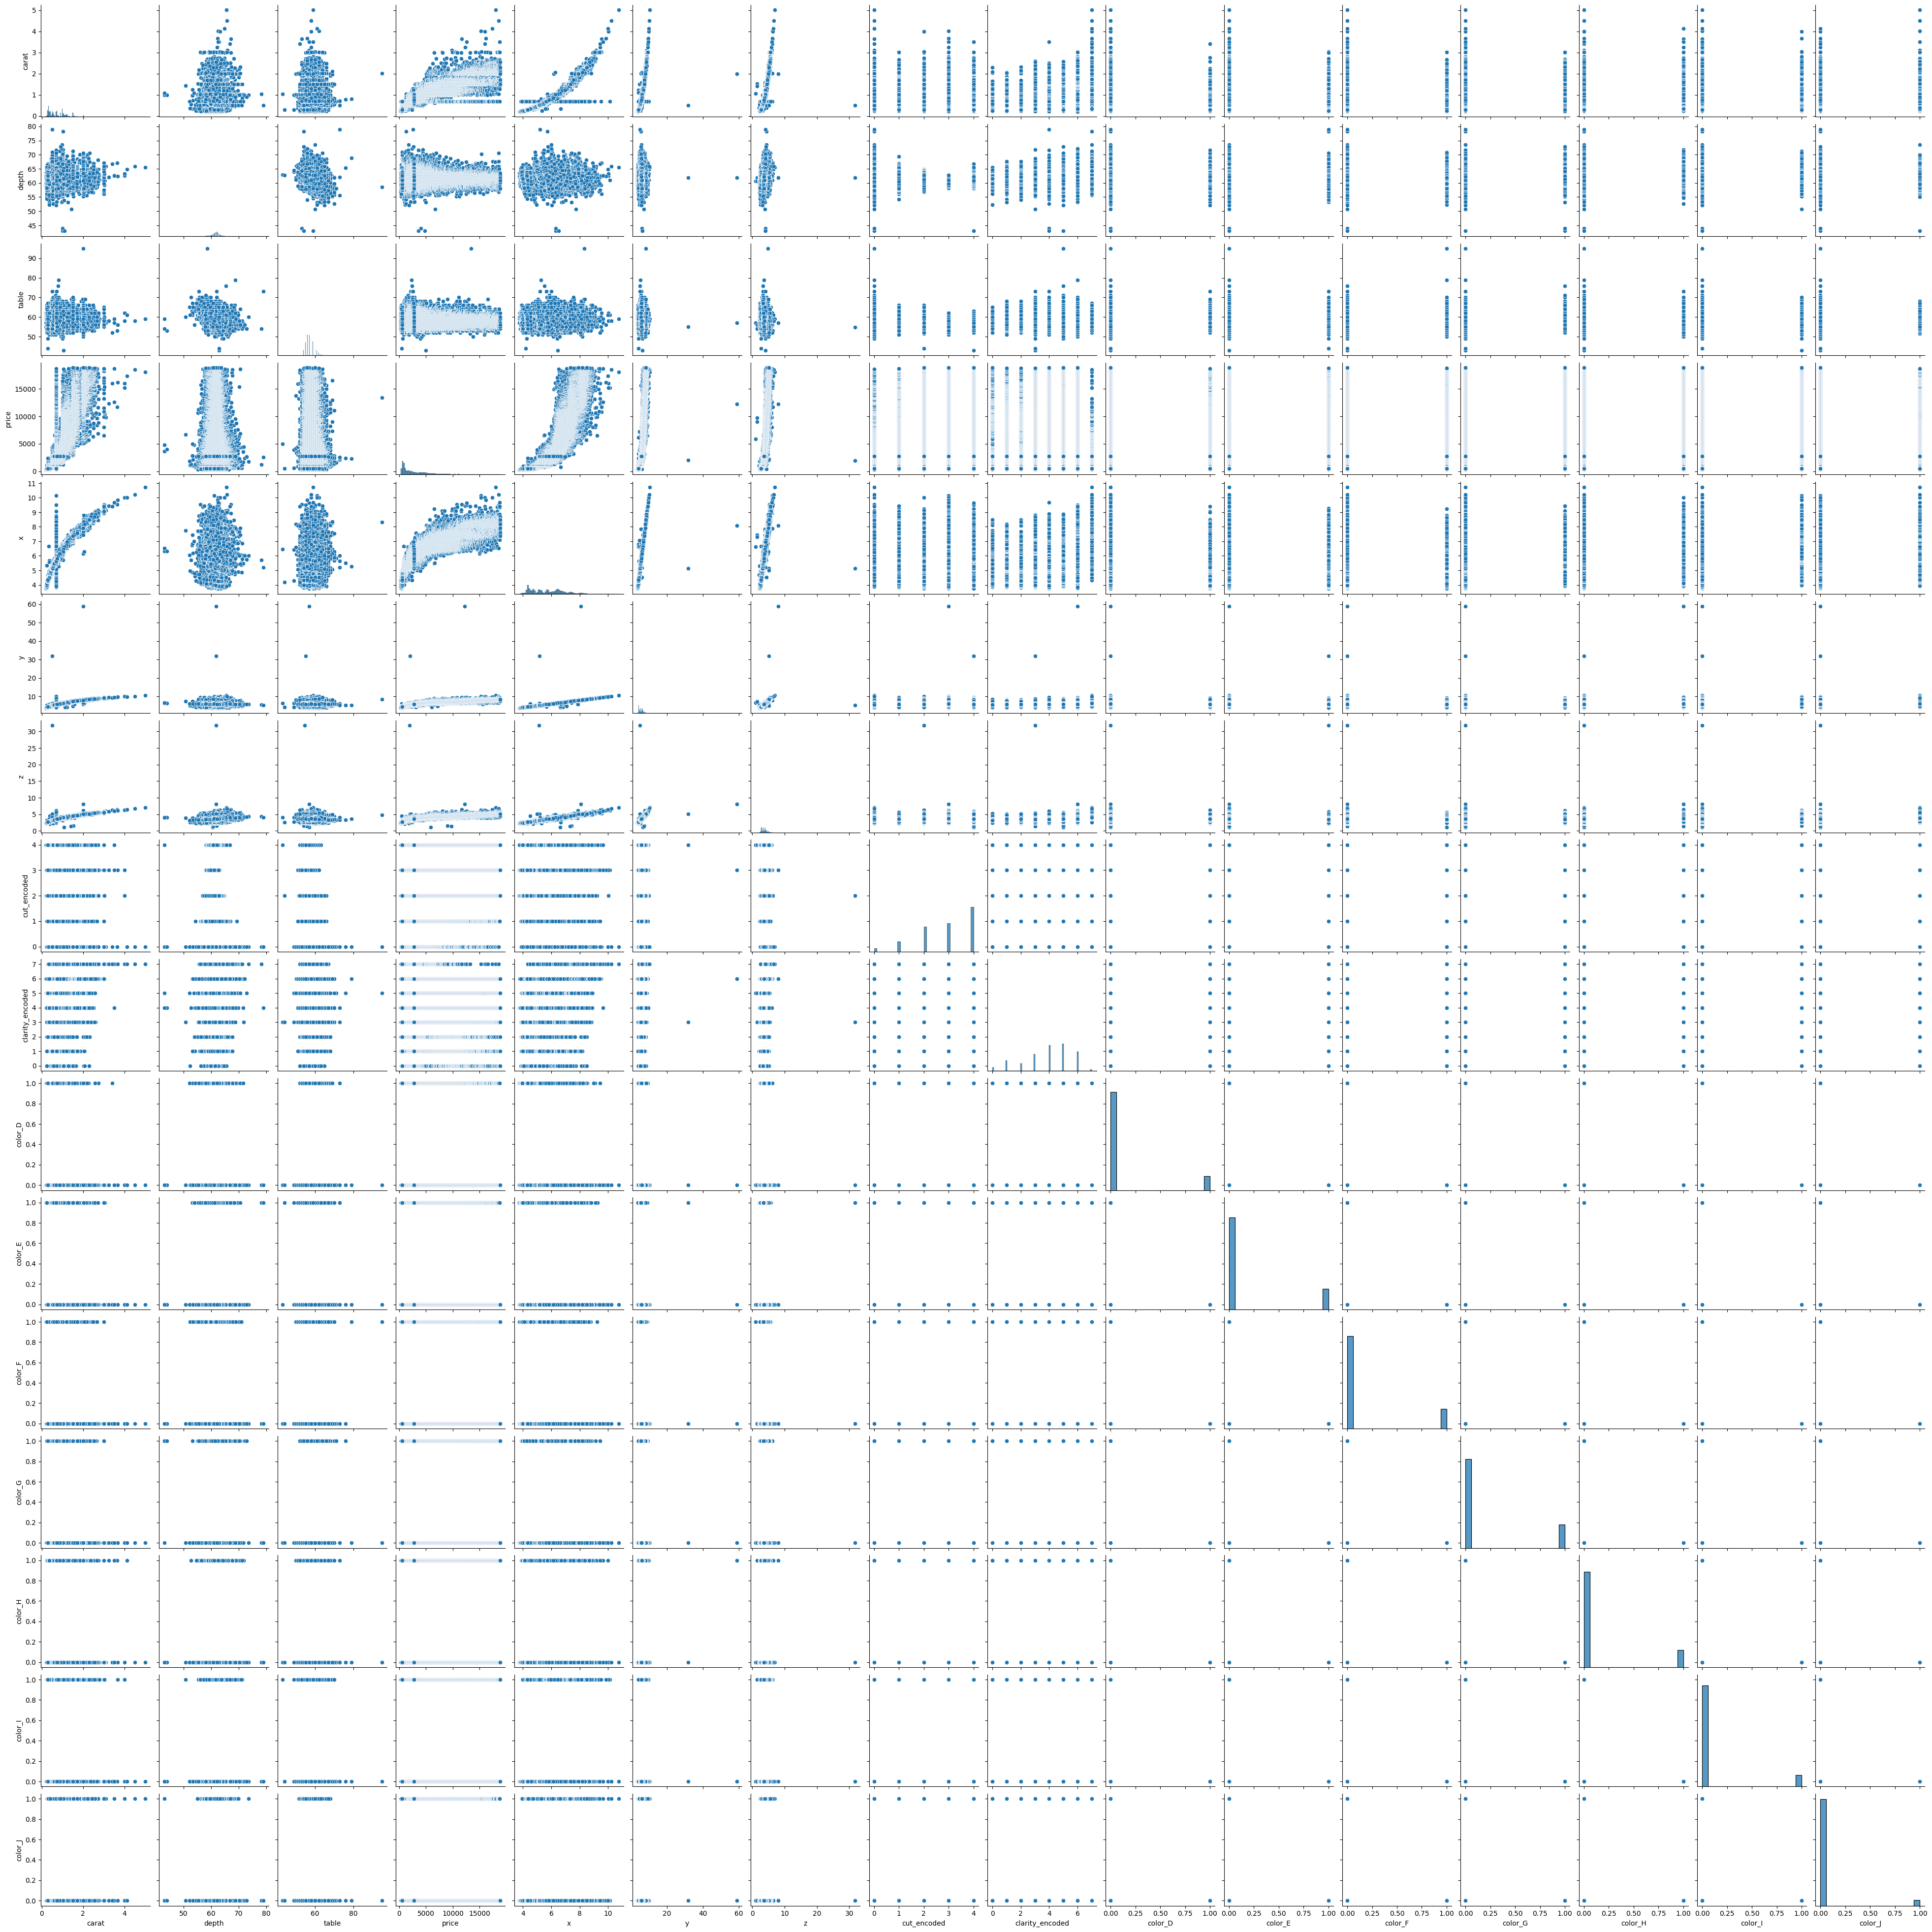

In [77]:
sns.pairplot(df_encoded)

In [78]:
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

In [79]:
from sklearn.ensemble import RandomForestRegressor

rndForest = RandomForestRegressor(n_estimators=100, random_state=43)
rndForest.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': rndForest.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
4,y,0.865379
7,clarity_encoded,0.062606
0,carat,0.015468
14,color_J,0.010908
3,x,0.010302
13,color_I,0.007828
5,z,0.006360
12,color_H,0.005618
1,depth,0.003085
8,color_D,0.002790


In [80]:
from sklearn.inspection import permutation_importance

res = permutation_importance(rndForest, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

y:1.2430 
clarity_encoded:0.1682 
carat:0.0528 
color_J:0.0409 
x:0.0340 
color_I:0.0326 
z:0.0261 
color_H:0.0191 
color_D:0.0129 
color_G:0.0097 
color_E:0.0084 
color_F:0.0076 
depth:0.0037 
table:0.0032 
cut_encoded:0.0031 


In [81]:
from sklearn.ensemble import GradientBoostingRegressor

gradBoost = GradientBoostingRegressor(random_state=11)
gradBoost.fit(X, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': gradBoost.feature_importances_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
4,y,0.800097
5,z,0.097301
7,clarity_encoded,0.060202
3,x,0.011154
14,color_J,0.009160
0,carat,0.008536
13,color_I,0.005610
8,color_D,0.002046
10,color_F,0.001777
12,color_H,0.001547


In [82]:
from sklearn.inspection import permutation_importance

res = permutation_importance(gradBoost, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

y:0.9738 
z:0.1360 
clarity_encoded:0.1339 
x:0.0233 
color_J:0.0212 
carat:0.0168 
color_I:0.0108 
color_D:0.0066 
color_E:0.0036 
color_H:0.0033 
color_F:0.0026 
cut_encoded:0.0011 
color_G:0.0005 
depth:0.0004 
table:0.0000 


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

linReg = LinearRegression()
linReg.fit(X_scaled, y)

feat_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': linReg.coef_
}).sort_values(by='importance', ascending=False)
feat_importances

,feature,importance
0,carat,4185.283453
8,color_D,205.471146
9,color_E,157.914145
6,cut_encoded,135.047421
10,color_F,114.216658
4,y,89.921587
11,color_G,41.530599
5,z,-33.298311
2,table,-49.894303
1,depth,-66.645380


In [84]:
from sklearn.inspection import permutation_importance

res = permutation_importance(linReg, X, y, n_repeats=10, n_jobs=-1, random_state=12)

sorted_idx = res.importances_mean.argsort()[::-1]

for i in sorted_idx:
    print(f"{X.columns[i]}:" f"{res.importances_mean[i]:.4f} ")

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


carat:1.0577 
y:0.0296 
clarity_encoded:0.0081 
color_D:0.0003 
depth:-0.0000 
color_F:-0.0001 
color_G:-0.0002 
color_J:-0.0006 
color_H:-0.0006 
color_E:-0.0009 
color_I:-0.0011 
cut_encoded:-0.0053 
table:-0.0060 
z:-0.0064 
x:-0.0362 


Обучение моделий

In [85]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train_binned = pd.qcut(y_train, q=5, labels=False)

In [86]:
X

,carat,depth,table,x,y,z,cut_encoded,clarity_encoded,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,3.95,3.98,2.43,4,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.21,59.8,61.0,3.89,3.84,2.31,3,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.29,62.4,58.0,4.20,4.23,2.63,3,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.31,63.3,58.0,4.34,4.35,2.75,1,6,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53800,0.72,60.8,57.0,5.75,5.76,3.50,4,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53801,0.72,63.1,55.0,5.69,5.75,3.61,1,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53802,0.70,62.8,60.0,5.66,5.68,3.56,2,5,1.0,0.0,0.0,0.0,0.0,0.0,0.0
53803,0.86,61.0,58.0,6.15,6.12,3.74,3,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [87]:
features_2 = ['y', 'clarity_encoded']
features_3 = ['cut_encoded', 'carat', 'clarity_encoded']
features_all = ['carat',	'depth',	'table',	'x',	'y',	'z',	'cut_encoded',	'clarity_encoded',	'color_D',	'color_E',	'color_F',	'color_G',	'color_H', 'color_I',	'color_J']

In [88]:
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(
        n_estimators=100, max_depth=10, min_samples_split=5,
        min_samples_leaf=2, random_state=42, n_jobs=-1
    ),
    'GradientBoosting': GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=5,
        min_samples_split=5, min_samples_leaf=2, random_state=42
    )
}

In [89]:
def train_and_evaluate_model(model, features):
    X_train_f = X_train[features]
    X_test_f = X_test[features]

    if isinstance(model, LinearRegression):
        scaler = StandardScaler()
        X_train_sc = scaler.fit_transform(X_train_f)
        X_test_sc = scaler.transform(X_test_f)
        cv = cross_val_score(model, X_train_sc, y_train,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train_f, y_train_binned),
                             scoring='r2')
        model.fit(X_train_sc, y_train)
        y_pred_test = model.predict(X_test_sc)
    else:
        cv = cross_val_score(model, X_train_f, y_train,
                             cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42).split(X_train_f, y_train_binned),
                             scoring='r2')
        model.fit(X_train_f, y_train)
        y_pred_test = model.predict(X_test_f)

    test_r2 = r2_score(y_test, y_pred_test)
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    test_mae = mean_absolute_error(y_test, y_pred_test)

    return {
        'model': model,
        'cv_mean_r2': cv.mean(),
        'test_r2': test_r2,
        'test_rmse': test_rmse,
        'test_mae': test_mae
    }

In [90]:
all_results = {}
for name, feats in [('с 2 признаками', features_2), ('с 3 признаками', features_3), ('с всеми признаками', features_all)]:
    all_results[name] = {}
    for model_name, model in models.items():
        result = train_and_evaluate_model(model, feats)
        all_results[name][model_name] = result

comparison_data = []
for feat_set, models_res in all_results.items():
    for model_name, res in models_res.items():
        comparison_data.append({
            'Набор признаков': feat_set,
            'Модель': model_name,
            'CV R²': f"{res['cv_mean_r2']:.4f}",
            'Test R²': f"{res['test_r2']:.4f}",
            'Test RMSE': f"{res['test_rmse']:.2f}",
            'Test MAE': f"{res['test_mae']:.2f}"
        })

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

   Набор признаков           Модель  CV R² Test R² Test RMSE Test MAE
    с 2 признаками LinearRegression 0.7692  0.8231   1643.93  1195.81
    с 2 признаками     RandomForest 0.9342  0.9354    993.57   549.08
    с 2 признаками GradientBoosting 0.9361  0.9371    980.08   543.58
    с 3 признаками LinearRegression 0.8762  0.8760   1376.56   917.60
    с 3 признаками     RandomForest 0.9280  0.9312   1024.89   547.70
    с 3 признаками GradientBoosting 0.9288  0.9315   1022.84   546.52
с всеми признаками LinearRegression 0.8926  0.8938   1273.95   855.23
с всеми признаками     RandomForest 0.9763  0.9783    576.13   315.23
с всеми признаками GradientBoosting 0.9801  0.9810    538.76   292.25
